# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


At the end of the experiment, you will be able to:
- Understand CIFAR-10 dataset
- Experiment using the MLP algorithm



## Dataset

#### Description

In this experiment, we will use the CIFAR-10 dataset. It consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

**The code returns the contents of each data file as a dictionary**.

There are 8 pickled (To know more about pickle refer **Python_Pickle_Introduction** notebook )files in the CIFAR-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch

Getting into details of this dataset:


**data** : A 50,000x3072 numpy array of unsigned integers. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** : A list of 50,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.



### DataSource

https://www.cs.toronto.edu/~kriz/cifar.html

## Keywords



*   Perceptron
*   Linear Classifier
*   CIFAR-10
*   Multi-class Classification

### Setup Steps

### Expected time to complete experiment is 60 min

In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
from sklearn.decomposition import PCA
import itertools
import operator
import random
import collections
from scipy import stats
from sklearn.metrics import accuracy_score

#### Function to unpickle the data

In [0]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_1 = pickle.load(fo, encoding='Latin1')
    return dict_1

### Visualizing the images in CIFAR-10 Dataset


When you pass a pickled file to the get_data function it returns features, labels, file names, list of classes of the corresponding file.

In [0]:
def get_data(file):
  dict_1 = unpickle(file)
  X = np.asarray(dict_1['data']).astype("uint8")
  Y = np.asarray(dict_1['labels'])
  names = np.asarray(dict_1['filenames'])
  list_class=(unpickle("AIML_DS_CIFAR-10_STD/batches.meta")['label_names'])
  return X,Y,names,list_class

In [0]:
# Function to visualize the data
def visualize_image(X, Y, names, image_id,size=(5,5)):
    rgb = X[image_id,:]
    plt.figure(figsize = size)
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    print(img.shape)
    plt.grid(False)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

Class = horse
(32, 32, 3)


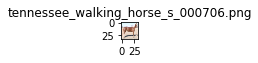

(32, 32, 3)


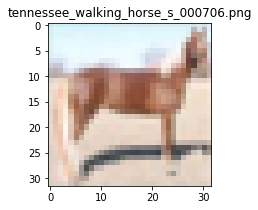

In [0]:
# Read 10000 images -- from batch 3
X, Y, names, classes = get_data("AIML_DS_CIFAR-10_STD/data_batch_3")
# Display the 10th image
pick = 10
print("Class =",classes[Y[pick]])
visualize_image(X, Y, names, pick,size=(0.3,0.3)) # output image would be a blured image
visualize_image(X, Y, names, pick,size=(3,3)) 

**NOTE: **

**The images you see above are pixelated and hence they are  blur.** (Pixelation happens when you display a low resolution of an image on a larger canvas (such a large screen), where each pixel ends up being displayed as an image. You could read more about it on https://whatis.techtarget.com/definition/pixelation ).  This however does not affect the prediction of your machine learning algorithm, for the same reason.

**Now let us unpickle the data and labels from CIFAR-10 dataset and divide them into training and testing sets..**

In [0]:
## Unpickling the data and labels from CIFAR-10 Dataset,
## and Preparing the raw features for training and test data.

X_train = []
Y_train = []
# Read all training features and labels
for j in "12345": 
    batch_file = 'AIML_DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    X_train.extend(x_train)
    Y_train.extend(y_train)

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

# Read all test features and labels
X_test, Y_test, names_test, classes_test = get_data("AIML_DS_CIFAR-10_STD/test_batch")

In [0]:
Y_test.shape, Y_train.shape, X_test.shape, X_train.shape

((10000,), (50000,), (10000, 3072), (50000, 3072))

Now, select only classes **5** , **7** and **9**, and make a linear classifier for these three classes. 

In [0]:
# Function to extract the classes
def extract_3classes(class0, class1,class2, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Select class #2
    X_2 = X[Y == class2]
    Y_2 = Y[Y == class2]
    # Join the two classes to make the set
    X_3classes = np.vstack((X_0, X_1,X_2))
    Y_3classes = np.concatenate((Y_0, Y_1,Y_2))
    return X_3classes, Y_3classes

In [0]:
# Select classes #5 and #7
X_train_3classes, Y_train_3classes = extract_3classes(5, 7,9, X_train, Y_train)
X_test_3classes, Y_test_3classes = extract_3classes(5, 7,9, X_test, Y_test)

In [0]:
Y_train_3classes

array([5, 5, 5, ..., 9, 9, 9])

### Training the classifier on raw features above

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation= "relu",solver= "lbfgs" ,hidden_layer_sizes = (15,10) ,learning_rate = 'constant',learning_rate_init=0.01)
# Fitting the data into the model
clf.fit(X_train_3classes, Y_train_3classes)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Calculating the accuracy

In [0]:
pred = clf.predict(X_test_3classes)
accuracy_score(pred, Y_test_3classes)

0.314

### It is expected for the accuracy above to be low, given that we are using the 'raw features of the image'

### Let us perform PCA on the data above to see if things get better

In [0]:
#You can try various values of principal components and arrive at the least number that doesn't change accuracy.
#Note: the fit_transform below, projects your data onto the 800 components and gets the projected value in each of the...
#...components. The projections are now considered as the feature representation of each image (as opposed to the image itself)
pca = PCA(n_components=800) 
#Fit on the entire data first
all_train_Features,_ = extract_3classes(5, 7,9, X_train, Y_train)
pca.fit(all_train_Features)
#Now transform the train and test
pca_train_features = pca.fit_transform(X_train_3classes)
pca_test_features = pca.fit_transform(X_test_3classes)

### Training the classifier with PCA features above

In [0]:
clf.fit(pca_train_features, Y_train_3classes)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Calculating the accuracy with the PCA Features above

In [0]:
pred = clf.predict(pca_test_features)

accuracy_score(pred, Y_test_3classes)



0.36433333333333334

### Feature type-3: Deep Features

In [0]:
### Loading the features
features = sio.loadmat('AIML_DS_CIFAR-10_STD/cifar10_deep_features.mat')

In [0]:
features.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x_test', 'x_train', 'y_train', 'y_test'])

In [0]:
# Extracting the deep features into training and testing
deep_features_train = features['x_train']
deep_labels_train = np.squeeze(np.transpose(features['y_train']))
deep_features_test = features['x_test']
deep_labels_test = np.squeeze(np.transpose(features['y_test']))
print(deep_features_train.shape, deep_labels_train.shape, deep_features_test.shape, deep_labels_test.shape)

(50000, 512) (50000,) (10000, 512) (10000,)


In [0]:
np.squeeze(deep_labels_train)

array([6, 9, 9, ..., 9, 1, 1])

In [0]:
# Extract features of class0 and class1
deep_features_train_3classes, deep_labels_train_3classes = extract_3classes(5, 7,9, deep_features_train, np.squeeze(deep_labels_train))
deep_features_test_3classes, deep_labels_test_3classes = extract_3classes(5, 7,9, deep_features_test, np.squeeze(deep_labels_test))

### Training the classifier with Deep Features above

In [0]:
clf.fit(deep_features_train_3classes, deep_labels_train_3classes)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Calculating the accuracy with the Deep Features above

In [0]:
pred = clf.predict(deep_features_test_3classes)

accuracy_score(pred, deep_labels_test_3classes)

0.976